In [1]:
import pandas as pd
import seaborn as sb
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
pd.set_option("display.precision", 2)

In [4]:
boxscores = pd.read_csv('../data/game_stats_2019.csv')

In [5]:
boxscores.describe()

mp       fg      fga   fg_pct      fg3     fg3a  fg3_pct       ft  \
count  26101.0  26101.0  26101.0  26101.0  26101.0  26101.0  26101.0  26101.0   
mean      22.8      3.9      8.4      0.4      1.1      3.0      0.3      1.7   
std       10.3      3.1      5.8      0.2      1.4      2.9      0.3      2.3   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%       16.0      1.0      4.0      0.3      0.0      1.0      0.0      0.0   
50%       24.0      3.0      7.0      0.4      1.0      2.0      0.2      1.0   
75%       31.0      6.0     12.0      0.6      2.0      5.0      0.5      2.0   
max       56.0     21.0     39.0      1.0     14.0     24.0      1.0     22.0   

           fta   ft_pct      trb      ast      stl      blk      tov      pts  
count  26101.0  26101.0  26101.0  26101.0  26101.0  26101.0  26101.0  26101.0  
mean       2.2      0.4      4.3      2.3      0.7      0.5      1.3     10.5  
std        2.8      0.4      3.6      2.5      1.0      0.8      1.4      8.4  
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
25%        0.0      0.0      2.0      0.0      0.0      0.0      0.0      4.0  
50%        2.0      0.5      3.0      2.0      0.0      0.0      1.0      9.0  
75%        4.0      1.0      6.0      3.0      1.0      1.0      2.0     15.0  
max       27.0      1.0     27.0     24.0      8.0      9.0     11.0     61.0

In [6]:
boxscores.head(5)

player  pos   date_game team_id  mp  fg  fga  fg_pct  fg3  fg3a  \
0  Álex Abrines  G-F  2018-10-16     OKC  23   3    8     0.4    2     6   
1  Steven Adams    C  2018-10-16     OKC  36   6   12     0.5    0     0   
2   Aron Baynes    C  2018-10-16     BOS  19   3    7     0.4    2     4   
3   Jordan Bell    F  2018-10-16     GSW   7   0    0     0.0    0     0   
4  Jonah Bolden    F  2018-10-16     PHI   1   0    0     0.0    0     0   

   fg3_pct  ft  fta  ft_pct  trb  ast  stl  blk  tov  pts  
0      0.3   0    0     0.0    2    0    0    0    0    8  
1      0.0   5    8     0.6   11    4    2    0    2   17  
2      0.5   0    0     0.0    4    3    0    0    1    8  
3      0.0   0    0     0.0    2    0    0    1    0    0  
4      0.0   0    0     0.0    0    0    0    0    0    0

In [7]:
bsg = boxscores_grouped = boxscores.groupby(['player'])
len(bsg)

530

In [8]:
# bsg.describe()

In [9]:
bsg.get_group('Aaron Gordon').describe()

mp    fg   fga  fg_pct   fg3  fg3a  fg3_pct    ft   fta  ft_pct  \
count  78.0  78.0  78.0    78.0  78.0  78.0     78.0  78.0  78.0    78.0   
mean   33.7   6.0  13.4     0.4   1.6   4.4      0.3   2.4   3.2     0.6   
std     4.4   2.4   3.6     0.1   1.2   2.0      0.2   2.3   2.9     0.4   
min    22.0   0.0   5.0     0.0   0.0   0.0      0.0   0.0   0.0     0.0   
25%    31.0   4.0  11.0     0.4   1.0   3.0      0.2   1.0   1.0     0.4   
50%    33.5   6.0  14.0     0.5   1.0   4.0      0.3   2.0   3.0     0.7   
75%    37.0   8.0  16.0     0.5   2.0   6.0      0.5   3.0   4.0     1.0   
max    42.0  13.0  20.0     0.8   4.0  10.0      1.0  13.0  13.0     1.0   

        trb   ast   stl   blk   tov   pts  
count  78.0  78.0  78.0  78.0  78.0  78.0  
mean    7.4   3.7   0.7   0.7   2.1  16.0  
std     3.2   2.0   0.8   0.9   1.5   6.2  
min     1.0   0.0   0.0   0.0   0.0   0.0  
25%     5.0   2.0   0.0   0.0   1.0  12.0  
50%     7.0   3.0   1.0   1.0   2.0  16.5  
75%     9.8   5.0   1.0   1.0   2.8  20.0  
max    16.0  10.0   3.0   3.0   8.0  31.0

In [10]:
sp.stats.zscore([7,11,13,45,1])

array([-0.54697887, -0.28651274, -0.15627968,  1.92744937, -0.93767807])

In [11]:
stat_fields = ['mp', 'fg', 'fga', 'fg_pct', 'fg3', 'fg3a', 'fg3_pct', 'ft', 'fta', 'ft_pct', 'trb', 'ast', 'stl', 'blk', 'tov', 'pts']

In [12]:
def apply_zscores(x):
    x.loc[:, stat_fields].apply(sp.stats.zscore)

In [13]:
boxscores.columns

Index(['player', 'pos', 'date_game', 'team_id', 'mp', 'fg', 'fga', 'fg_pct',
       'fg3', 'fg3a', 'fg3_pct', 'ft', 'fta', 'ft_pct', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pts'],
      dtype='object')

In [14]:
boxscores.loc[:, stat_fields].describe()

mp       fg      fga   fg_pct      fg3     fg3a  fg3_pct       ft  \
count  26101.0  26101.0  26101.0  26101.0  26101.0  26101.0  26101.0  26101.0   
mean      22.8      3.9      8.4      0.4      1.1      3.0      0.3      1.7   
std       10.3      3.1      5.8      0.2      1.4      2.9      0.3      2.3   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%       16.0      1.0      4.0      0.3      0.0      1.0      0.0      0.0   
50%       24.0      3.0      7.0      0.4      1.0      2.0      0.2      1.0   
75%       31.0      6.0     12.0      0.6      2.0      5.0      0.5      2.0   
max       56.0     21.0     39.0      1.0     14.0     24.0      1.0     22.0   

           fta   ft_pct      trb      ast      stl      blk      tov      pts  
count  26101.0  26101.0  26101.0  26101.0  26101.0  26101.0  26101.0  26101.0  
mean       2.2      0.4      4.3      2.3      0.7      0.5      1.3     10.5  
std        2.8      0.4      3.6      2.5      1.0      0.8      1.4      8.4  
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0  
25%        0.0      0.0      2.0      0.0      0.0      0.0      0.0      4.0  
50%        2.0      0.5      3.0      2.0      0.0      0.0      1.0      9.0  
75%        4.0      1.0      6.0      3.0      1.0      1.0      2.0     15.0  
max       27.0      1.0     27.0     24.0      8.0      9.0     11.0     61.0

In [15]:
# list(bsg.groups)

In [16]:
means = [bsg[field].aggregate('mean') for field in stat_fields]
stds = [bsg[field].aggregate('std') for field in stat_fields]

/home/cliebmann/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


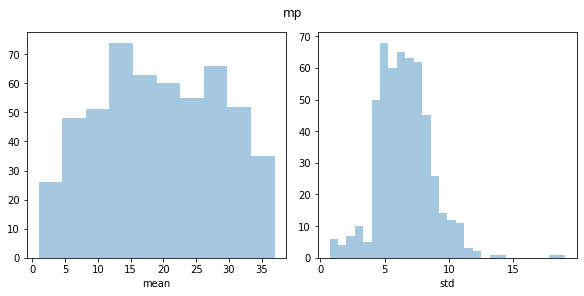

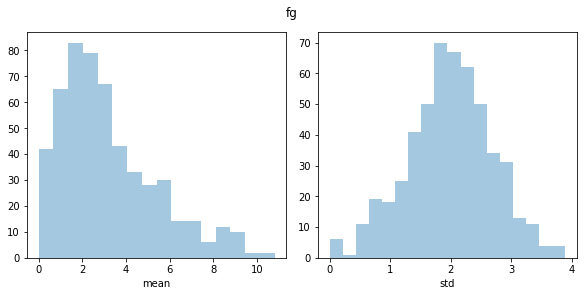

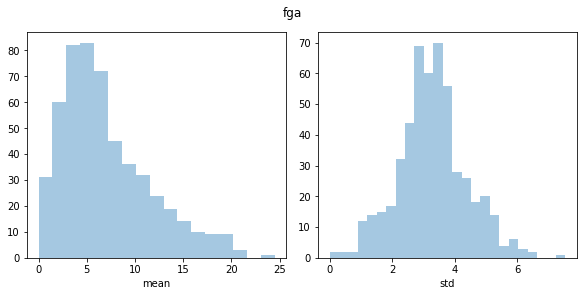

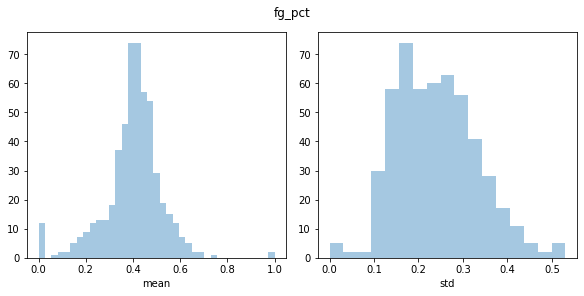

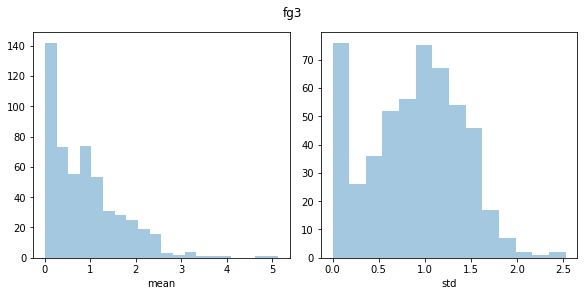

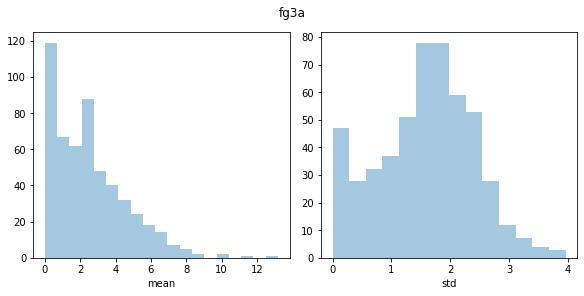

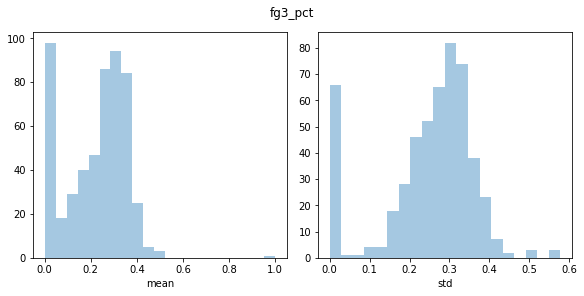

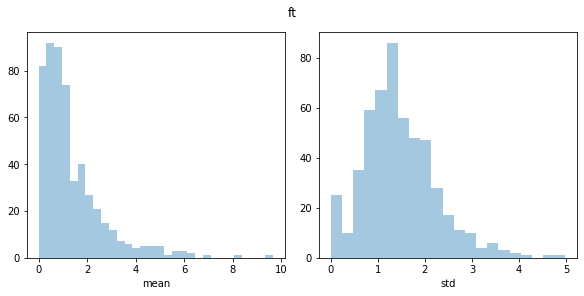

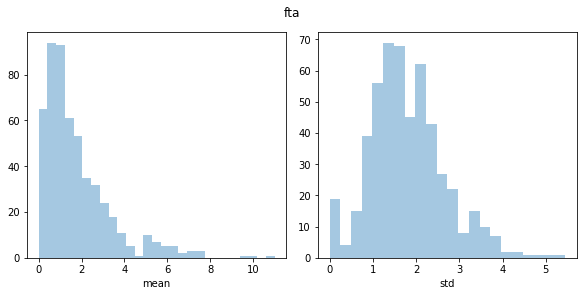

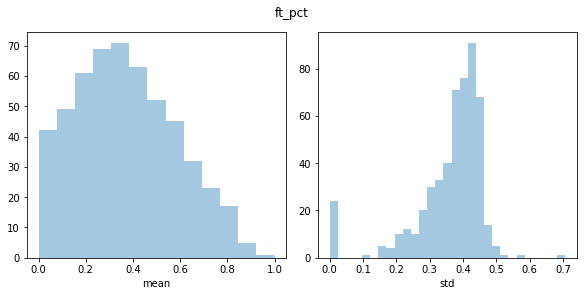

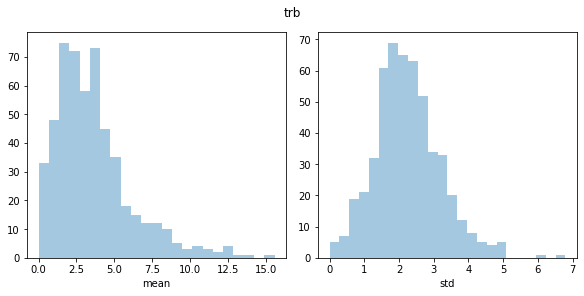

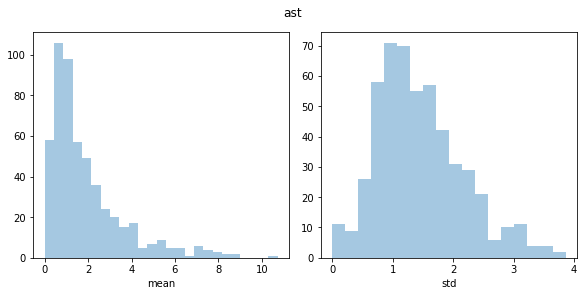

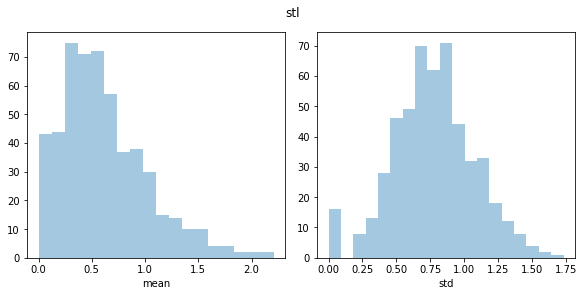

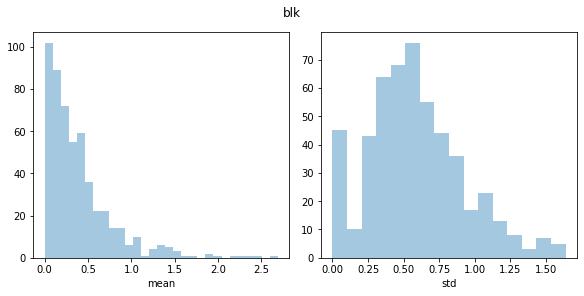

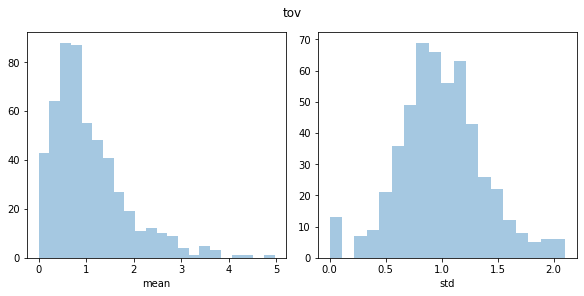

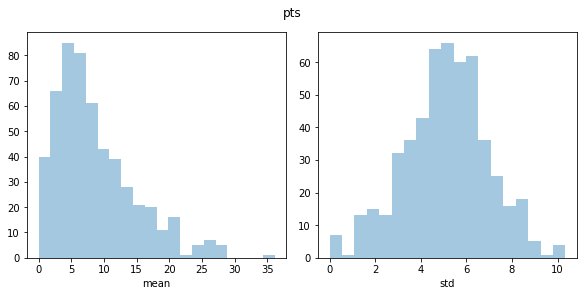

In [17]:
for field, mean, std in zip(stat_fields, means, stds):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4), constrained_layout=True)
    fig.suptitle(field)
    sb.distplot(mean, kde=False, axlabel='mean', ax=axs[0])
    sb.distplot(std.dropna(), kde=False, axlabel='std', ax=axs[1])
    fig.show()

In [18]:
bsg.get_group("Thaddeus Young").describe()

mp    fg   fga  fg_pct   fg3  fg3a  fg3_pct    ft   fta  ft_pct  \
count  81.0  81.0  81.0    81.0  81.0  81.0     81.0  81.0  81.0    81.0   
mean   30.7   5.5  10.4     0.5   0.6   1.8      0.2   1.1   1.7     0.4   
std     4.5   2.2   3.2     0.1   0.8   1.5      0.3   1.5   1.9     0.4   
min    17.0   1.0   2.0     0.1   0.0   0.0      0.0   0.0   0.0     0.0   
25%    28.0   4.0   8.0     0.4   0.0   1.0      0.0   0.0   0.0     0.0   
50%    31.0   5.0  10.0     0.5   0.0   2.0      0.0   1.0   2.0     0.2   
75%    34.0   6.0  13.0     0.6   1.0   3.0      0.5   2.0   2.0     0.8   
max    41.0  11.0  19.0     0.9   3.0   6.0      1.0   8.0   9.0     1.0   

        trb   ast   stl   blk   tov   pts  
count  81.0  81.0  81.0  81.0  81.0  81.0  
mean    6.5   2.5   1.5   0.4   1.5  12.6  
std     2.8   1.8   1.3   0.7   1.3   5.3  
min     1.0   0.0   0.0   0.0   0.0   2.0  
25%     5.0   1.0   1.0   0.0   0.0  10.0  
50%     6.0   2.0   1.0   0.0   1.0  11.0  
75%     9.0   4.0   2.0   1.0   2.0  16.0  
max    15.0   8.0   5.0   3.0   5.0  27.0

In [19]:
bsg.get_group('Joe Ingles').describe()

mp    fg   fga  fg_pct   fg3  fg3a  fg3_pct    ft   fta  ft_pct  \
count  82.0  82.0  82.0    82.0  82.0  82.0     82.0  82.0  82.0    82.0   
mean   31.3   4.4   9.8     0.4   2.3   5.9      0.4   1.1   1.5     0.4   
std     4.7   2.1   2.9     0.2   1.5   2.2      0.2   1.5   1.8     0.4   
min    14.0   0.0   2.0     0.0   0.0   1.0      0.0   0.0   0.0     0.0   
25%    28.0   3.0   8.0     0.3   1.0   4.0      0.2   0.0   0.0     0.0   
50%    32.0   4.0  10.0     0.4   2.0   6.0      0.4   0.0   1.0     0.0   
75%    35.0   6.0  12.0     0.5   3.0   8.0      0.5   2.0   2.0     0.8   
max    46.0  10.0  15.0     1.0   7.0  11.0      1.0   6.0   7.0     1.0   

        trb   ast   stl   blk   tov   pts  
count  82.0  82.0  82.0  82.0  82.0  82.0  
mean    4.0   5.7   1.2   0.2   2.4  12.1  
std     2.3   2.5   1.1   0.6   1.4   5.5  
min     0.0   1.0   0.0   0.0   0.0   2.0  
25%     2.0   4.0   0.0   0.0   1.0   8.0  
50%     4.0   6.0   1.0   0.0   2.0  12.0  
75%     5.0   7.0   2.0   0.0   3.0  15.0  
max    12.0  14.0   5.0   3.0   7.0  27.0

In [20]:
bs_25mp = bsg.filter(lambda x: x['mp'].mean() > 25)
bsg_25mp = bs_25mp.groupby(['player'])

In [22]:
# bsg_25mp.describe()

In [23]:
means_25mp = [bsg_25mp[field].mean() for field in stat_fields]
stds_25mp = [bsg_25mp[field].std() for field in stat_fields]

/home/cliebmann/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


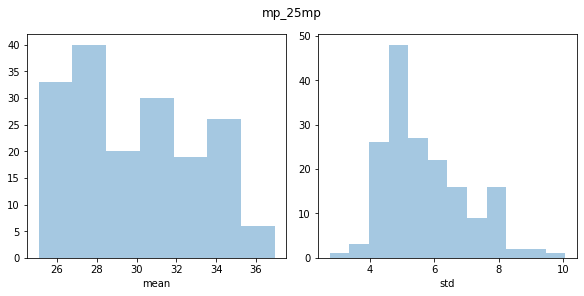

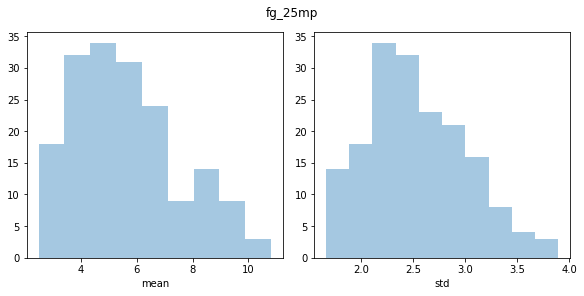

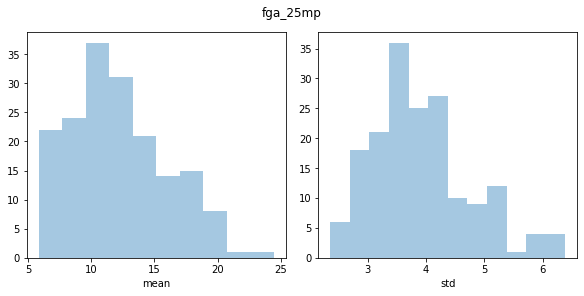

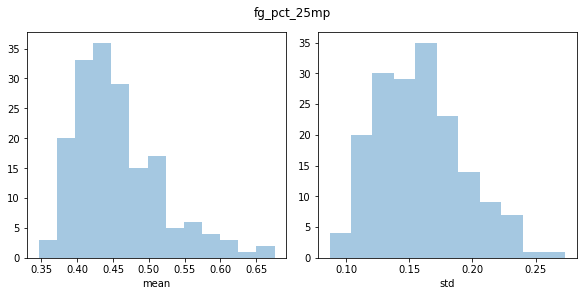

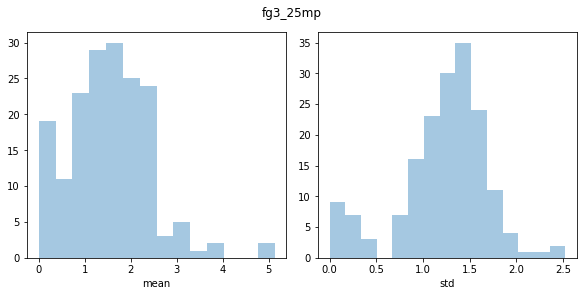

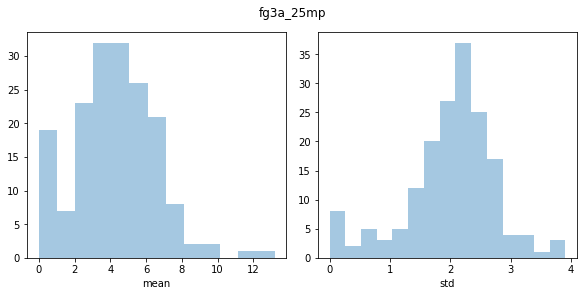

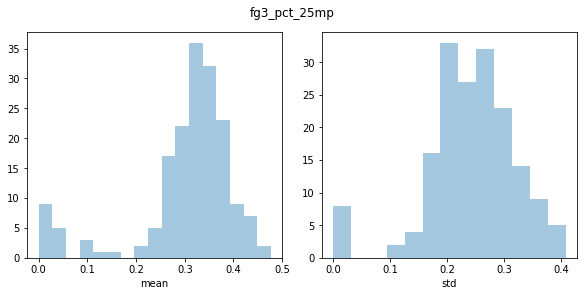

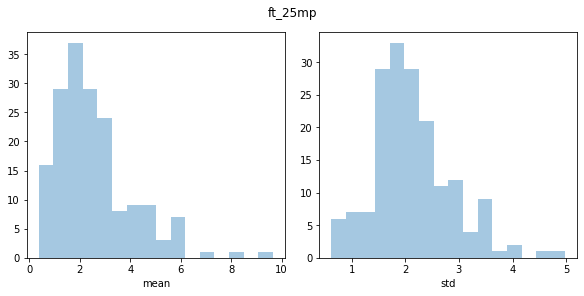

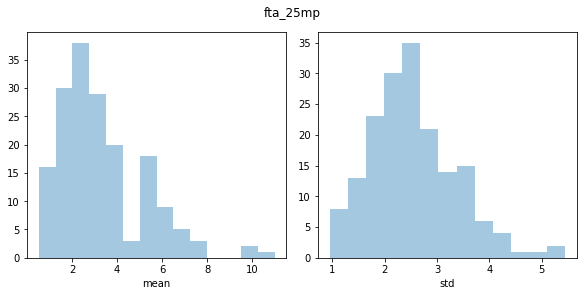

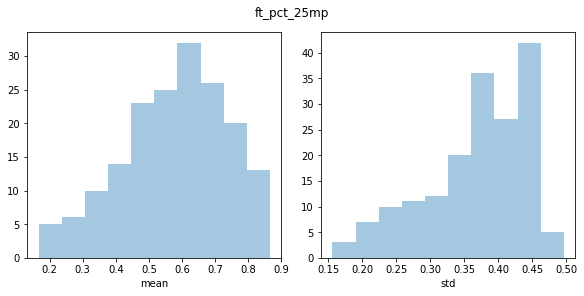

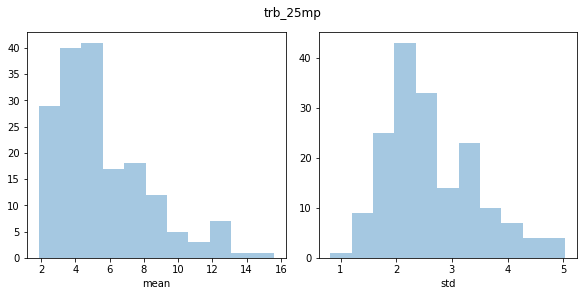

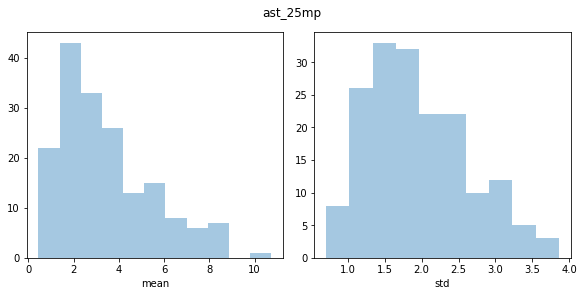

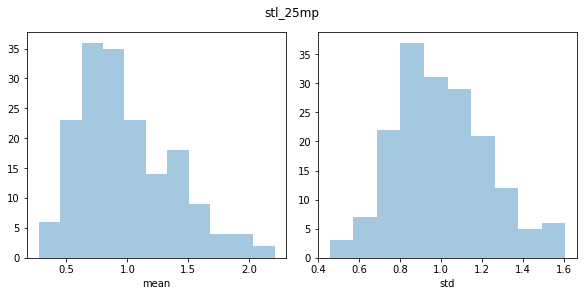

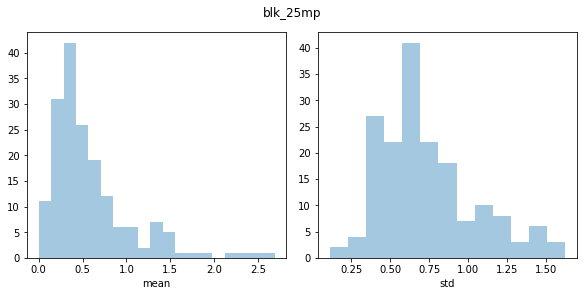

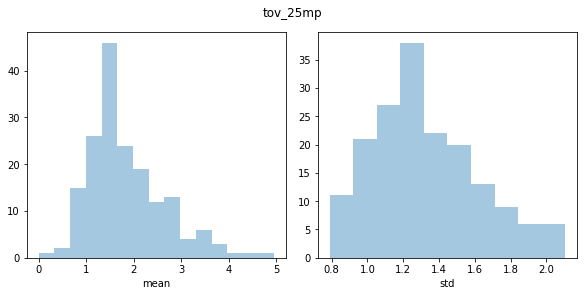

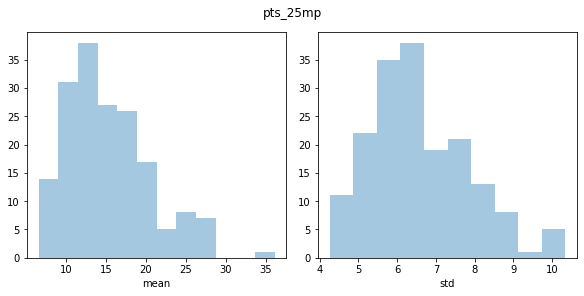

In [24]:
for field, mean, std in zip(stat_fields, means_25mp, stds_25mp):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4), constrained_layout=True)
    fig.suptitle(f'{field}_25mp')
    sb.distplot(mean, kde=False, axlabel='mean', ax=axs[0])
    sb.distplot(std.dropna(), kde=False, axlabel='std', ax=axs[1])
    fig.show()

In [33]:
def my_distplot(data, kde, label, axlabel, ax):
    sb.distplot(data, kde=kde, hist=(not kde), kde_kws={'shade': True}, label=label, axlabel=axlabel, ax=ax)

/home/cliebmann/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


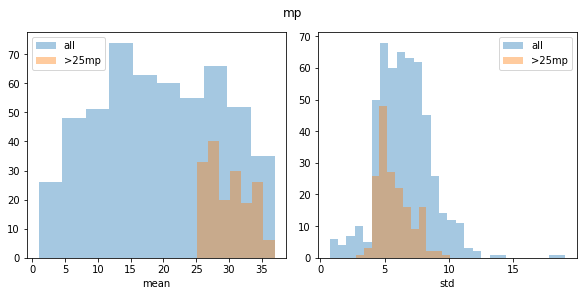

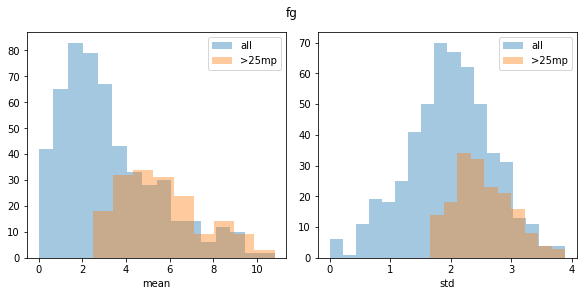

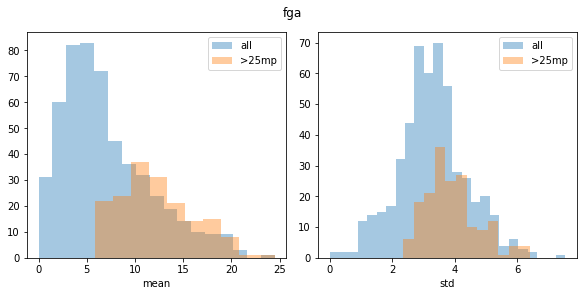

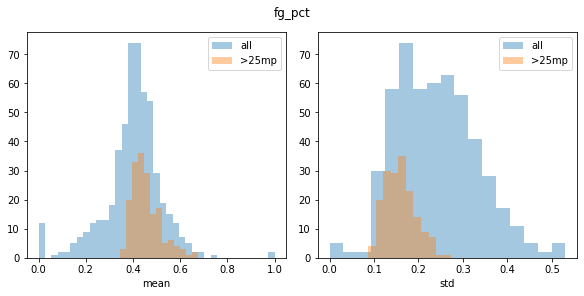

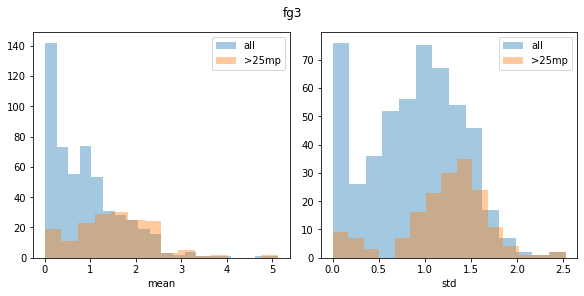

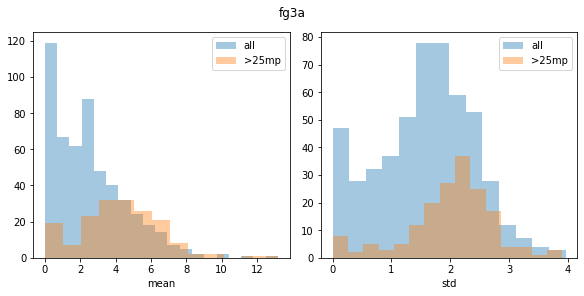

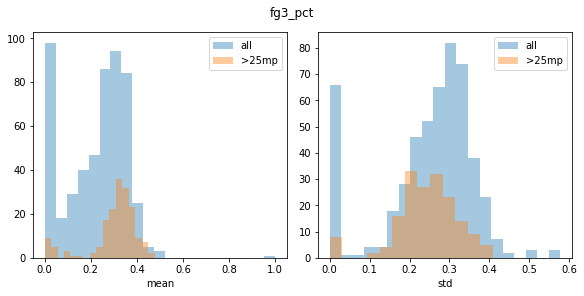

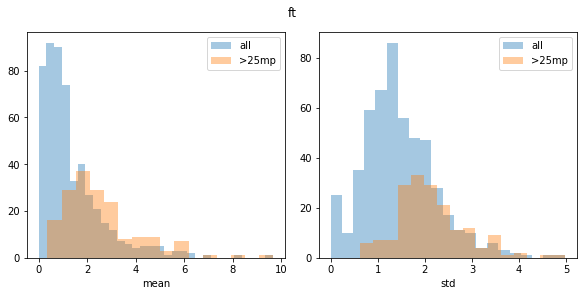

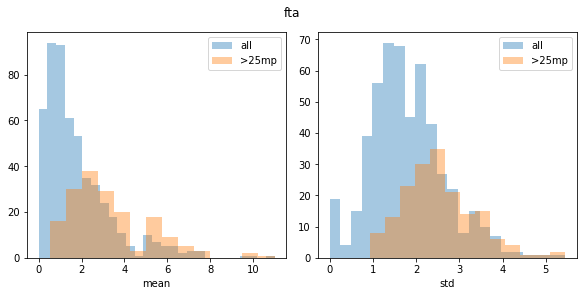

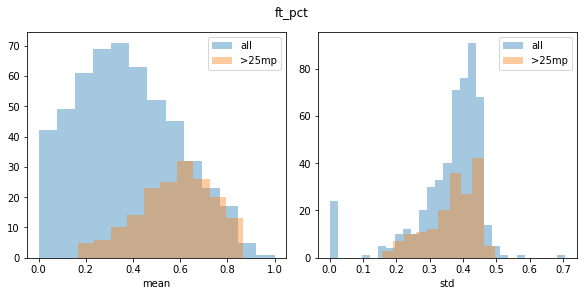

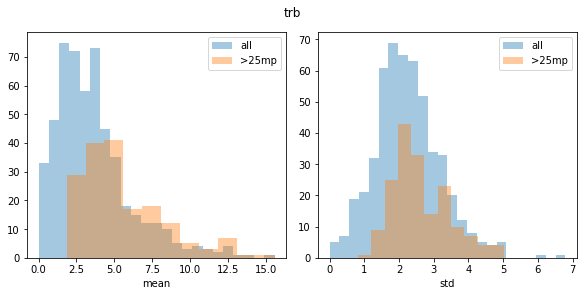

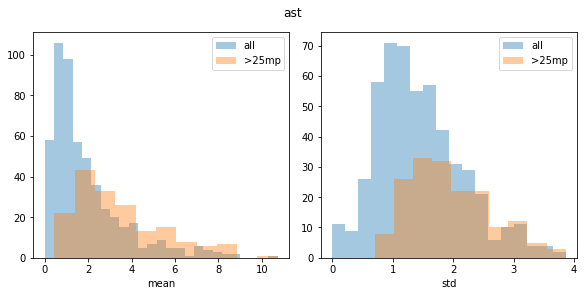

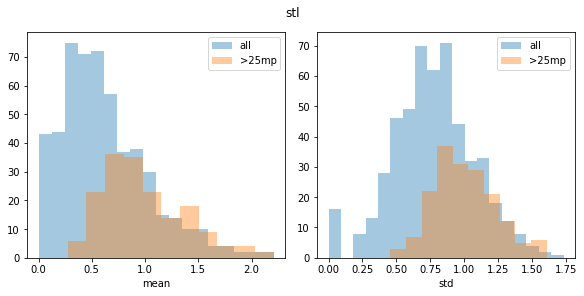

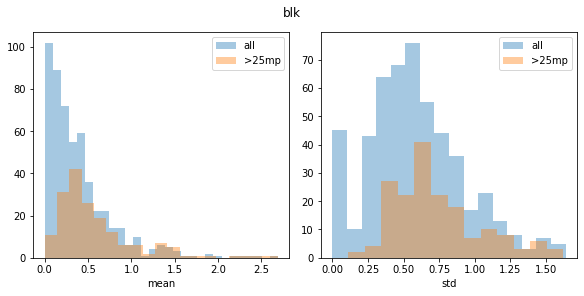

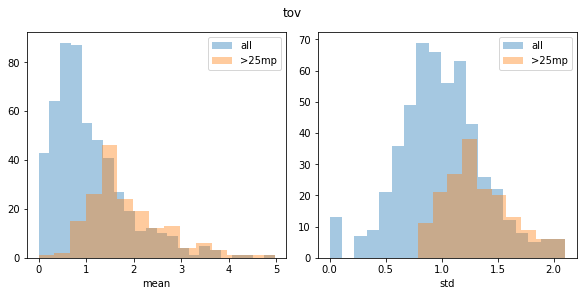

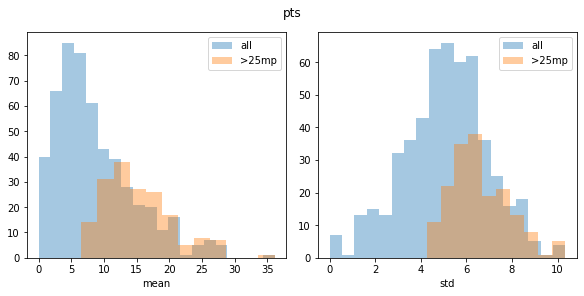

In [34]:
for field, mean, mean_25mp, std, std_25mp in zip(stat_fields, means, means_25mp, stds, stds_25mp):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4), constrained_layout=True)
    fig.suptitle(f'{field}')
    my_distplot(mean, kde=False, label='all', axlabel='mean', ax=axs[0])
    my_distplot(mean_25mp, kde=False, label='>25mp', axlabel='mean', ax=axs[0])
    my_distplot(std.dropna(), kde=False, label='all', axlabel='std', ax=axs[1])
    my_distplot(std_25mp.dropna(), kde=False, label='>25mp', axlabel='std', ax=axs[1])
    axs[0].legend()
    axs[1].legend()
    fig.show()

/home/cliebmann/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


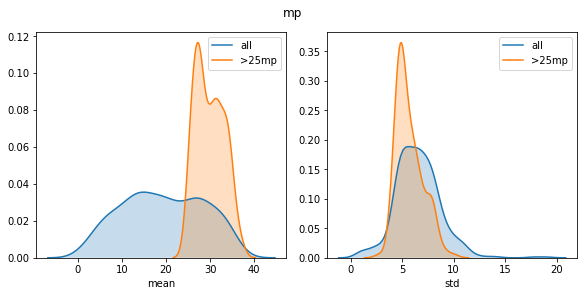

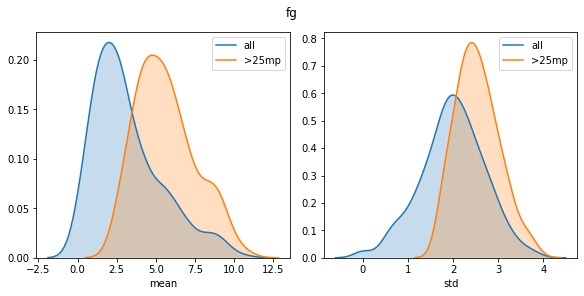

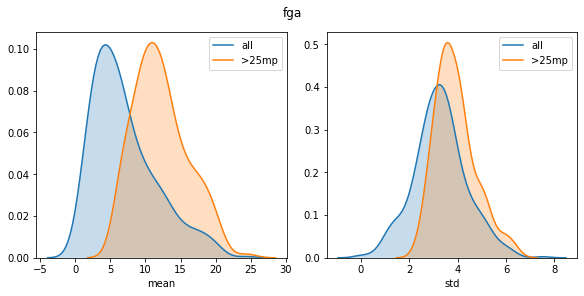

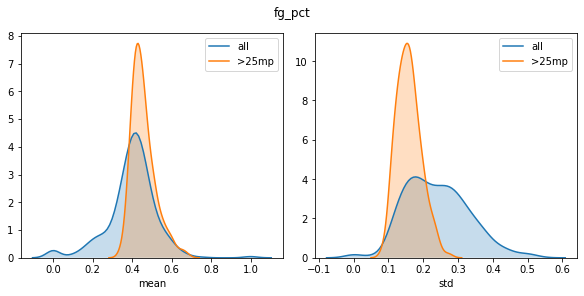

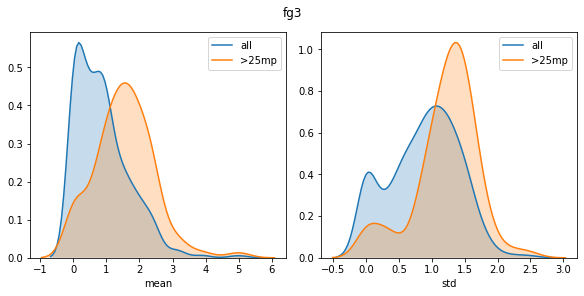

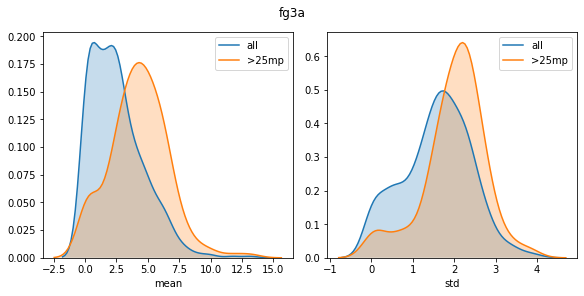

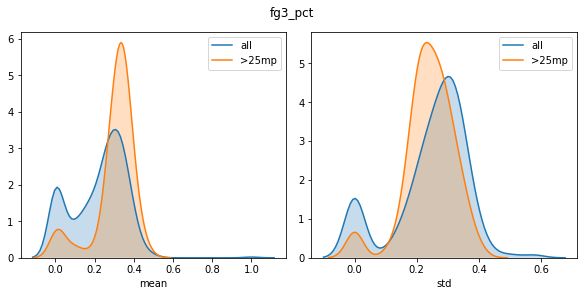

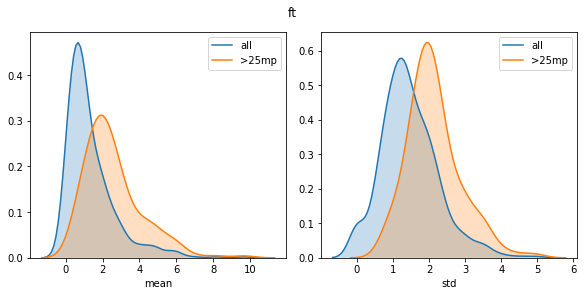

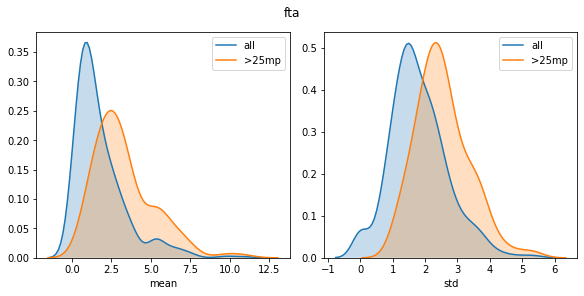

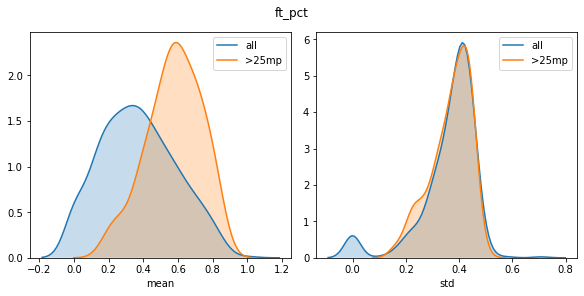

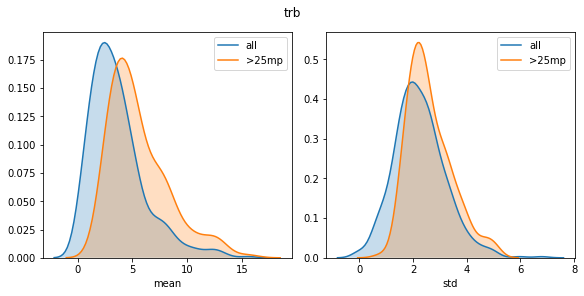

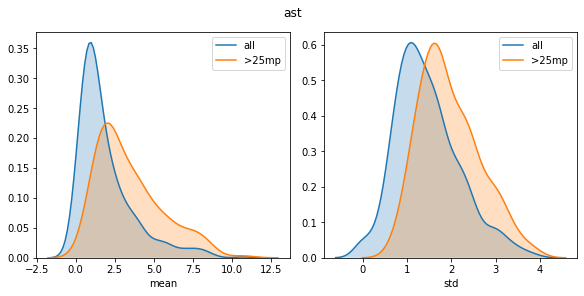

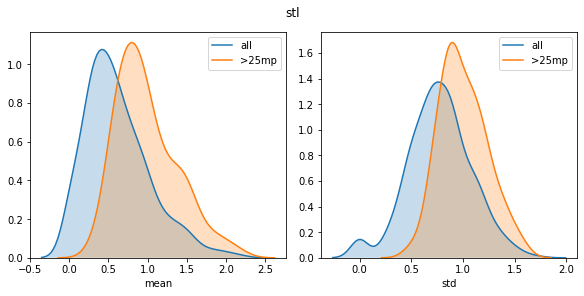

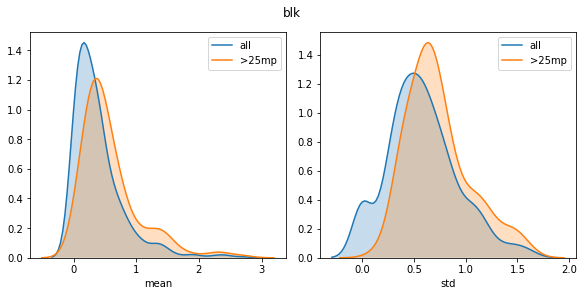

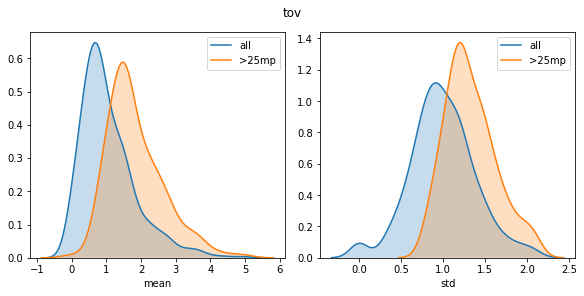

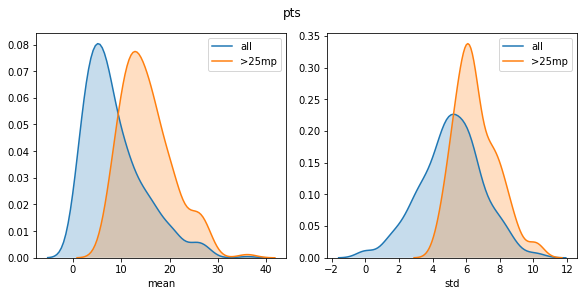

In [35]:
for field, mean, mean_25mp, std, std_25mp in zip(stat_fields, means, means_25mp, stds, stds_25mp):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4), constrained_layout=True)
    fig.suptitle(f'{field}')
    my_distplot(mean, kde=True, label='all', axlabel='mean', ax=axs[0])
    my_distplot(mean_25mp, kde=True, label='>25mp', axlabel='mean', ax=axs[0])
    my_distplot(std.dropna(), kde=True, label='all', axlabel='std', ax=axs[1])
    my_distplot(std_25mp.dropna(), kde=True, label='>25mp', axlabel='std', ax=axs[1])
    axs[0].legend()
    axs[1].legend()
    fig.show()